In [1]:
import pandas as pd
import numpy as np
from benchmarks import MinVarianceMethod
from environment import Environment
from utils import get_stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading Environments

In [2]:
env = Environment()
minvar_method = MinVarianceMethod(allow_short=True)

/Users/njh/Documents/qf634-quant-research-methods/environment.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(axis=0, inplace=True)


# Testing and getting results

In [3]:
WINDOW_FIT = 180
WINDOW_HOLD = 180
N_ASSETS = len(env.returns.columns)
actions_equal, actions_minvar = [], []
result_equal, result_minvar = [], []


for i in range(WINDOW_FIT, len(env.returns), WINDOW_HOLD):
    if (i + WINDOW_FIT > len(env.returns)) :
        print("Exceeded training and hold window, will stop")
        break

    state = env.get_state(
        start=i, 
        length=WINDOW_FIT
        )
    
    equal_weights = np.ones(N_ASSETS) / N_ASSETS
    min_var_weights = minvar_method.get_optimal_weights(state)

    holding_period_returns = env.get_state(
        start = i + WINDOW_FIT, 
        length = WINDOW_HOLD
    )
    
    r = np.dot(holding_period_returns, equal_weights)
    result_equal.append(r.tolist())
    actions_equal.append(equal_weights)
    
    r = np.dot(holding_period_returns, min_var_weights)
    result_minvar.append(r.tolist())
    actions_minvar.append(min_var_weights)



Exceeded training and hold window, will stop


# Evaluation

In [4]:
def cumulative_pct_change(daily_returns: list) -> list:
    cum_pct_change = (1 + np.array(daily_returns) / 100).cumprod() - 1 
    return cum_pct_change * 100

In [5]:
test = [0, -50, 50]
assert cumulative_pct_change(test).tolist() == [0,-50.0,-25.0]

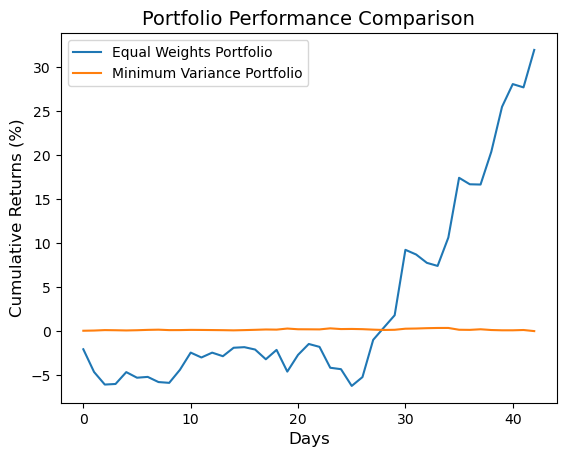

In [6]:
# flatten into list and compare results
equal_weights_daily_returns = [item for sublist in result_equal for item in sublist]
minvar_method_daily_returns = [item for sublist in result_minvar for item in sublist]


plt.figure()
plt.xlabel("Days", fontsize=12)
plt.ylabel("Returns (%)")
plt.plot(cumulative_pct_change(equal_weights_daily_returns), label = "Equal Weights Portfolio")
plt.plot(cumulative_pct_change(minvar_method_daily_returns), label = "Minimum Variance Portfolio")
plt.ylabel("Cumulative Returns (%)", fontsize=12)
plt.title("Portfolio Performance Comparison", fontsize=14)
plt.legend(fontsize=10)  # Add legend for clarity
plt.show()


In [7]:
results = []


equal_weights_stats = get_stats(equal_weights_daily_returns)
equal_weights_stats["Name"] = "Equal Weights Portfolio"


results.append(equal_weights_stats)

minvar_method_stats = get_stats(minvar_method_daily_returns)
minvar_method_stats["Name"] = "Minimum Variance Portfolio"
results.append(minvar_method_stats)



stats = pd.DataFrame(results).set_index("Name")
stats

,Cumulative Return,Sharpe Ratio,Maximum Drawdown,Value at Risk
Name,,,,
Equal Weights Portfolio,28.787104,0.309970,0.178504,2.384885
Minimum Variance Portfolio,-0.028700,-0.011255,1.087354,0.084590
